In [12]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
from tvDatafeed import TvDatafeed,Interval
import numpy as np

In [13]:
tv = TvDatafeed()

In [14]:
niftydf= tv.get_hist(symbol='NIFTY_50', exchange='NSE', interval=Interval.in_daily,n_bars=200)

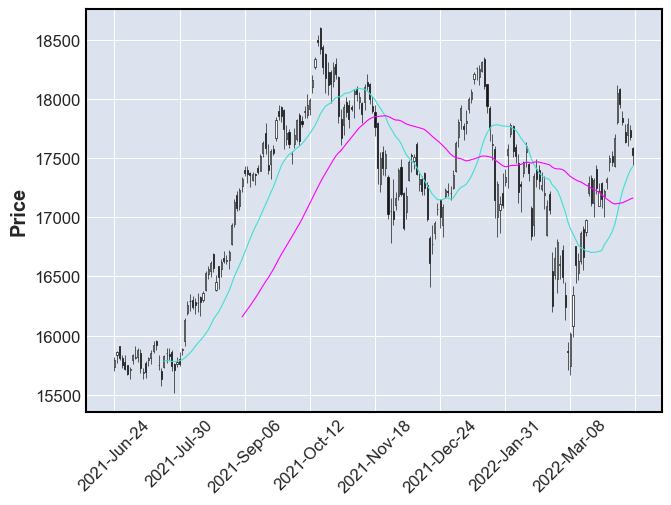

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-24 09:15:00,NSE:NIFTY_50,15737.300,15821.400,15702.700,15790.450,1.000000e+100
2021-06-25 09:15:00,NSE:NIFTY_50,15839.350,15870.800,15772.300,15860.350,1.000000e+100
2021-06-28 09:15:00,NSE:NIFTY_50,15915.350,15915.650,15792.150,15814.700,1.000000e+100
2021-06-29 09:15:00,NSE:NIFTY_50,15807.500,15835.900,15724.050,15748.450,1.000000e+100
2021-06-30 09:15:00,NSE:NIFTY_50,15776.900,15839.100,15708.750,15721.500,1.000000e+100
...,...,...,...,...,...,...
2022-04-06 09:15:00,NSE:NIFTY_50,17842.750,17901.000,17779.850,17807.650,1.000000e+100
2022-04-07 09:15:00,NSE:NIFTY_50,17723.301,17787.500,17623.699,17639.551,1.000000e+100
2022-04-08 09:15:00,NSE:NIFTY_50,17698.150,17842.750,17600.551,17784.350,1.000000e+100


In [15]:
x=mpf.plot(niftydf, type='candle', mav=(20,50))
niftydf

In [16]:
niftydf['SMA20']=niftydf['close'].rolling(window=20).mean()
niftydf['SMA50']=niftydf['close'].rolling(window=50).mean()

In [17]:
buy=np.where((niftydf['SMA20'].shift(-1)>niftydf['SMA50'].shift(-1)),1,np.nan)*niftydf['low']

In [18]:
sell=np.where((niftydf['SMA20'].shift(-1)<niftydf['SMA50'].shift(-1)),1,np.nan)*niftydf['low']

In [19]:
apd = [mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(niftydf['SMA20']), mpf.make_addplot(niftydf['SMA50'])]

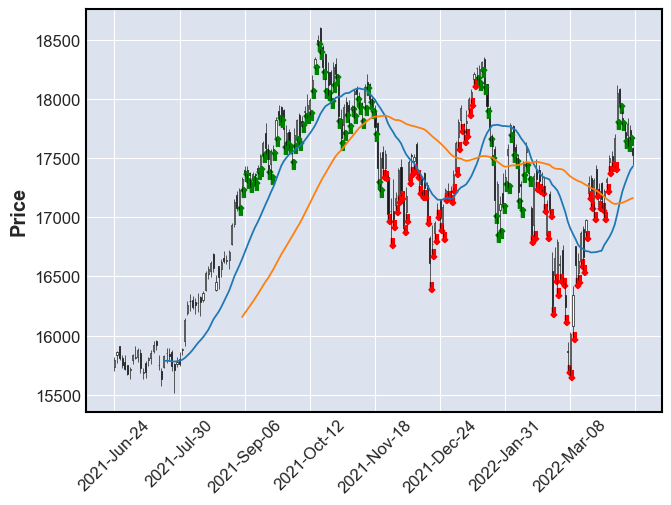

In [20]:
mpf.plot(niftydf, type='candle', addplot=apd)

In [21]:
pnl=buy.sum()-sell.sum()
pnl

273356.9069999999

In [22]:
# niftydf.to_csv('fag.csv')